# Test ellipse estimators


In [39]:
import numpy as  np 
import matplotlib.pyplot as plt
from skimage.measure.fit import EllipseModel
from pathlib import Path
from autonomy_utils.circle_pose_estimator import Ellipse2D

cx = 960
cy = 540 

## Estimate using skimage

### Ideal points

[166.6159562052165, -24.697650112206578, 208.9172000745542, 177.12867627827572, 0.50078913098374]


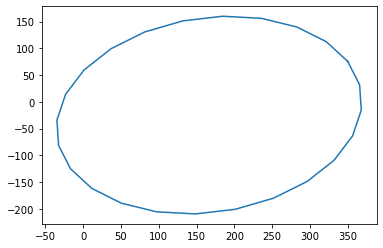

In [41]:
#Load data
X, Y = Ellipse2D.read_pts_in_file("./../output/sample_ellipse_01.txt")

xy = np.hstack([X-cx, Y-cy])
ellipse1 = EllipseModel()
status = ellipse1.estimate(xy)
if not status:
    raise ("Error estimating ellipse")

xc, yc, a, b, theta = ellipse1.params

# Generate some points
xy = ellipse1.predict_xy(np.linspace(0, 2 * np.pi, 25))
print(ellipse1.params)

plt.plot(xy[:,0], xy[:,1])

### Sift points

[160.52373875966288, -34.359855473850445, 214.40531252505946, 179.96718981630528, 0.6092914837354771]


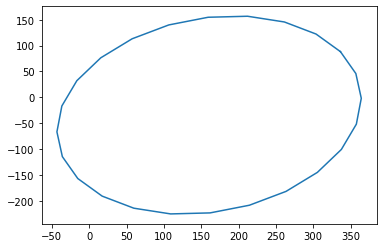

In [42]:
#Load data
X, Y = Ellipse2D.read_pts_in_file("./output/needle_segmentation_pts0_sift.txt")

xy = np.hstack([X-cx, Y-cy])
ellipse2 = EllipseModel()
status = ellipse2.estimate(xy)
if not status:
    raise ("Error estimating ellipse")

xc, yc, a, b, theta = ellipse2.params

# Generate some points
xy = ellipse2.predict_xy(np.linspace(0, 2 * np.pi, 25))

print(ellipse2.params)
plt.plot(xy[:,0], xy[:,1])

### Segmentation points



[199.72563604672882, 22.88226565563558, 171.998891078353, 143.85161498836348, -0.04921476405102402]


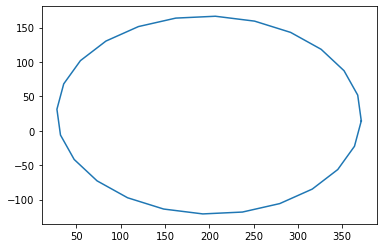

In [44]:
#Load data
X, Y = Ellipse2D.read_pts_in_file("./output/needle_segmentation_pts0.txt")

xy = np.hstack([X-cx, Y-cy])
ellipse3 = EllipseModel()
status = ellipse3.estimate(xy)
if not status:
    raise ("Error estimating ellipse")

xc, yc, a, b, theta = ellipse3.params

# Generate some points
xy = ellipse3.predict_xy(np.linspace(0, 2 * np.pi, 25))

print(ellipse3.params)
plt.plot(xy[:,0], xy[:,1])

In [45]:
def convert_to_implicit(x0,y0,a,b,theta):

    a_coef = a ** 2 * np.sin(theta) ** 2 + b ** 2 * np.cos(theta) ** 2
    b_coef = 2 * (b ** 2 - a ** 2) * np.sin(theta) * np.cos(theta)
    c_coef = a ** 2 * np.cos(theta) ** 2 + b ** 2 * np.sin(theta) ** 2
    d_coef = -2 * a_coef * x0 - b_coef * y0
    e_coef = -b_coef * x0 - 2 * c_coef * y0
    f_coef = ( a_coef * x0 ** 2 + b_coef * x0 * y0 + c_coef * y0 ** 2 - a ** 2 * b ** 2)

    # Scale
    scale_factor = 1e6 / f_coef
    a_coef, b_coef, c_coef, d_coef, e_coef, f_coef = (
        a_coef * scale_factor,
        b_coef * scale_factor,
        c_coef * scale_factor,
        d_coef * scale_factor,
        e_coef * scale_factor,
        f_coef * scale_factor,
    )

    return Ellipse2D(a_coef,b_coef,c_coef,d_coef,e_coef,f_coef)


In [48]:
my_ellipse1 = convert_to_implicit(*ellipse1.params)
my_ellipse2 = convert_to_implicit(*ellipse2.params)
my_ellipse3 = convert_to_implicit(*ellipse3.params)
print(f"ellipse1 {my_ellipse1}")
print(f"ellipse2 {my_ellipse2}")
print(f"ellipse3 {my_ellipse3}")

ellipse1    -97.048x^2    +29.330xy   -115.815y^2 +33063.954x -10607.514y +1000000.000 = 0
ellipse2    -87.632x^2    +30.326xy    -98.779y^2 +29176.187x -11656.146y +1000000.000 = 0
ellipse3    +88.673x^2     +3.740xy   +126.545y^2 -35506.038x  -6538.211y +1000000.000 = 0


In [ ]:
xc,yc,a,b,theta = ellipse.params
my_ellipse1 = convert_to_implicit([xc,yc],a,b,theta)
print(my_ellipse1)

    +0.709x^2     -0.214xy     +0.846y^2  -1487.256x   -630.653y +1000000.000 = 0
